In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [ ]:
df = pd.read_csv('/content/spam.csv' , encoding = 'latin-1')

In [ ]:
#rename
df.rename(columns = {'Category' :'target','Message':'text'}, inplace = True)

In [ ]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# 1. Data cleaning
df.drop( columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [ ]:
#rename
df.rename(columns = {'v1' :'target','v2':'text'}, inplace = True)

In [ ]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])


In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:

# check missing value

df.isna().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

581

In [ ]:
df.drop_duplicates(keep = 'first' , inplace = True)

In [ ]:

df.shape

(10162, 2)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['target'].value_counts()

target
0    8047
1    2115
Name: count, dtype: int64

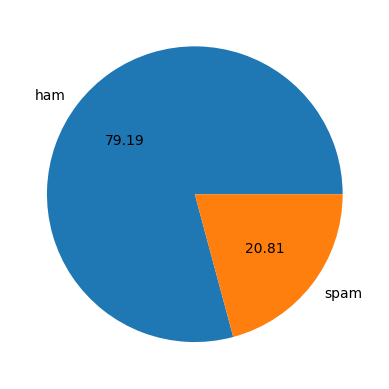

In [ ]:

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts() , labels = ['ham', 'spam'] ,autopct = '%0.2f')
plt.show()

In [ ]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_character']=df['text'].apply(len)

In [ ]:
df

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
10737,0,"fw : crosstex energy , driscoll ranch # 1 , #...",861
10738,0,put the 10 on the ft\r\nthe transport volumes...,526
10739,0,3 / 4 / 2000 and following noms\r\nhpl can ' ...,1106
10741,0,industrial worksheets for august 2000 activit...,565


In [ ]:
df['num_word']=df['text'].apply( lambda x: nltk.word_tokenize(x)).apply(len)

In [ ]:

df['num_sentence']=df['text'].apply( lambda x: nltk.sent_tokenize(x)).apply(len)

In [ ]:
df

,target,text,num_character,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
10737,0,"fw : crosstex energy , driscoll ranch # 1 , #...",861,195,9
10738,0,put the 10 on the ft\r\nthe transport volumes...,526,154,7
10739,0,3 / 4 / 2000 and following noms\r\nhpl can ' ...,1106,304,13
10741,0,industrial worksheets for august 2000 activit...,565,110,20


In [ ]:

df[['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,10162.000000,10162.000000,10162.000000
mean,561.694450,123.220527,7.577249
std,1191.658714,261.691005,20.438804
min,2.000000,0.000000,0.000000
25%,55.250000,14.000000,1.000000
50%,142.000000,30.500000,3.000000
75%,532.000000,120.000000,7.000000
max,32250.000000,8861.000000,1204.000000


In [ ]:

df[df['target'] == 0 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,8047.000000,8047.000000,8047.000000
mean,472.608053,109.882068,6.138934
std,1035.363196,246.858760,17.504968
min,2.000000,1.000000,1.000000
25%,47.000000,12.000000,1.000000
50%,104.000000,25.000000,2.000000
75%,426.000000,102.000000,6.000000
max,32250.000000,8861.000000,1204.000000


In [ ]:

df[df['target'] == 1 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,2115.000000,2115.000000,2115.000000
mean,900.643972,173.969740,13.049645
std,1612.562568,306.544391,28.351355
min,3.000000,0.000000,0.000000
25%,149.000000,29.000000,3.000000
50%,323.000000,65.000000,5.000000
75%,855.500000,172.000000,13.000000
max,22065.000000,3961.000000,693.000000


In [ ]:
# Data preprocessing
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and  i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [ ]:
ps = PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df['transform_text'] = df['text'].apply(transform_text)

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['transform_text']).toarray()
y = df['target'].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
255/255 [==============================] - 17s 57ms/step - loss: 0.3934 - accuracy: 0.8435 - val_loss: 0.2122 - val_accuracy: 0.9292
Epoch 2/10
255/255 [==============================] - 12s 48ms/step - loss: 0.1389 - accuracy: 0.9612 - val_loss: 0.1353 - val_accuracy: 0.9459
Epoch 3/10
255/255 [==============================] - 12s 48ms/step - loss: 0.0707 - accuracy: 0.9809 - val_loss: 0.1147 - val_accuracy: 0.9543
Epoch 4/10
255/255 [==============================] - 13s 49ms/step - loss: 0.0433 - accuracy: 0.9898 - val_loss: 0.1085 - val_accuracy: 0.9577
Epoch 5/10
255/255 [==============================] - 12s 49ms/step - loss: 0.0288 - accuracy: 0.9941 - val_loss: 0.1055 - val_accuracy: 0.9592
Epoch 6/10
255/255 [==============================] - 12s 48ms/step - loss: 0.0213 - accuracy: 0.9962 - val_loss: 0.1069 - val_accuracy: 0.9587
Epoch 7/10
255/255 [==============================] - 12s 46ms/step - loss: 0.0157 - accuracy: 0.9966 - val_loss: 0.1108 - val_accuracy:

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

64/64 [==============================] - 1s 15ms/step - loss: 0.1166 - accuracy: 0.9572
Test accuracy: 0.9572060704231262


In [79]:
import pickle

# Save the TF-IDF vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Save the trained model
model.save('model.h5')


In [80]:
from tensorflow.keras.models import load_model

In [81]:
def load_resources(vectorizer_path, model_path):
    try:
        with open(vectorizer_path, 'rb') as f:
            vectorizer = pickle.load(f)
        model = load_model(model_path)
        return vectorizer, model
    except Exception as e:
        print("Error loading resources:", e)
        return None, None


In [82]:
def preprocess_text(text):
    processed_text = text.lower()
    processed_text = nltk.word_tokenize(processed_text)
    processed_text = [word for word in processed_text if word.isalnum()]
    processed_text = [word for word in processed_text if word not in stopwords.words('english') and word not in string.punctuation]
    ps = PorterStemmer()
    processed_text = [ps.stem(word) for word in processed_text]
    return " ".join(processed_text)


In [83]:

def check_spam_or_not(email_text):
    vectorizer_path = '/content/vectorizer.pkl'
    model_path = '/content/model.h5'
    vectorizer, model = load_resources(vectorizer_path, model_path)

    if vectorizer is None or model is None:
        return "Failed to load resources"

    preprocessed_text = preprocess_text(email_text)
    text_vector = vectorizer.transform([preprocessed_text]).toarray()
    prediction = model.predict(text_vector)

    if prediction >= 0.5:
        return 'Spam'
    else:
        return 'Not Spam'


In [84]:
# Example usage:
email_text = "Congratulations! You've won a free vacation. Click here to claim your prize."
result = check_spam_or_not(email_text)
print("Prediction:", result)

1/1 [==============================] - 0s 308ms/step
Prediction: Spam


In [85]:
# Get user input
email_text = input("Enter the email text: ")

# Call the function to check if the email is spam or not
result = check_spam_or_not(email_text)
print("Prediction:", result)


Enter the email text: Congratulations! You've been selected as the winner of our exclusive prize draw. Click the link below to claim your prize now:  http://spammylink.com/claim  Don't miss out on this amazing opportunity!
1/1 [==============================] - 0s 64ms/step
Prediction: Spam


In [86]:
# Get user input
email_text = input("Enter the email text: ")

# Call the function to check if the email is spam or not
result = check_spam_or_not(email_text)
print("Prediction:", result)

Enter the email text: hi, how are you? i am fine. i am visiting you next week. lets meet up
1/1 [==============================] - 0s 51ms/step
Prediction: Not Spam
